In [54]:
from keras.datasets import reuters
import numpy as np
import keras
from keras.utils import to_categorical
from keras import layers
from keras import models
import matplotlib.pyplot as plt
import copy

In [2]:
(train_data,train_label),(test_data,test_label) = reuters.load_data(num_words=10000)

In [3]:
a = (train_data,train_label)
print(len(train_data))
print(len(train_label))
print(train_data.shape)
print(train_label.shape)
print(train_label[1])
print(train_data[1])

8982
8982
(8982,)
(8982,)
4
[1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]


In [4]:
word_index = reuters.get_word_index()
print(len(word_index))
print(type(word_index))
print(word_index['innovation'])
# print(word_index.items())
print(type(word_index.items()))


30979
<class 'dict'>
11780
<class 'dict_items'>


In [5]:
reverse_word_index = dict([(value,key) for (key , value) in word_index.items()])
print(type(reverse_word_index))
print(reverse_word_index[1])

<class 'dict'>
the


In [6]:
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
decoded_newswire1 = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[1]])


In [7]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    print(results.shape)
    print(results.ndim)
 
    for i,sequence in enumerate(sequences):
#         print(sequence)   
#         print(i)
        results[i, sequence] = 1.
    return results


In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)



(8982, 10000)
2
(2246, 10000)
2


In [9]:
print(x_train.shape)
print(x_test[0][270])
print(x_test[0].shape)

(8982, 10000)
1.0
(10000,)


In [10]:
re = np.zeros((10,10))
re[0][[7,6,5]] = 1
print(re[0])

[0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]


In [11]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i,label in enumerate(labels):
        results[i, label] = 1.
    return results
        

In [12]:
y_train = to_one_hot(train_label)
y_test = to_one_hot(test_label)

In [33]:
one_hot_train_labels = to_categorical(train_label)
one_hot_test_labels = to_categorical(test_label)
print(one_hot_train_labels.shape)

(8982, 46)


In [44]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [45]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [46]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [47]:
print(x_val.shape)
print(partial_x_train.shape)
print(y_val.shape)
print(partial_y_train.shape)

(1000, 10000)
(7982, 10000)
(1000, 46)
(7982, 46)


In [48]:
history = model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=1000,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 204us/step - loss: 3.0988 - acc: 0.4278 - val_loss: 2.2901 - val_acc: 0.5760
Epoch 2/9
7982/7982 [==============================] - 1s 141us/step - loss: 1.8783 - acc: 0.6398 - val_loss: 1.6518 - val_acc: 0.6560
Epoch 3/9
7982/7982 [==============================] - 1s 151us/step - loss: 1.3705 - acc: 0.7160 - val_loss: 1.3779 - val_acc: 0.7150
Epoch 4/9
7982/7982 [==============================] - 1s 139us/step - loss: 1.0946 - acc: 0.7666 - val_loss: 1.2179 - val_acc: 0.7410
Epoch 5/9
7982/7982 [==============================] - 1s 141us/step - loss: 0.9089 - acc: 0.8062 - val_loss: 1.1249 - val_acc: 0.7640
Epoch 6/9
7982/7982 [==============================] - 1s 152us/step - loss: 0.7602 - acc: 0.8434 - val_loss: 1.0445 - val_acc: 0.7940
Epoch 7/9
7982/7982 [==============================] - 1s 139us/step - loss: 0.6434 - acc: 0.8675 - val_loss: 0.9985 - val_acc: 0.8020
Epoch 8

In [108]:
print(type(partial_x_train))
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
print(type(loss))
print(len(loss))
print(len(epochs))

<class 'numpy.ndarray'>
<class 'list'>
9
9


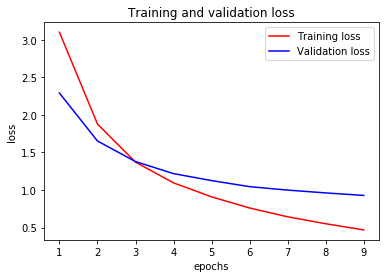

In [50]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

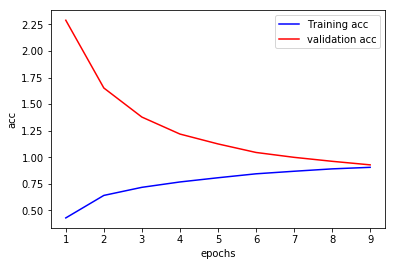

In [51]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_loss, 'r', label='validation acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [52]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 143us/step


In [53]:
print(results)
print(type(results))

[1.0102305473860946, 0.7853962600708857]
<class 'list'>


In [70]:
test_labels_copy = copy.copy(test_label)
print((test_labels_copy))
np.random.shuffle(test_labels_copy)
print(test_labels_copy)
hits_array = np.array(test_label) == np.array(test_labels_copy)
print(hits_array)
float(np.sum(hits_array)) / len(test_label)

[ 3 10  1 ...  3  3 24]
[ 4  3 30 ...  3  4 26]
[False False False ...  True False False]


0.1834372217275156

In [103]:
print(x_test[0])
predictions = model.predict(x_test)
print(predictions.shape)
l=[]
print(len(predictions[0]))

for i in range(len(predictions[0])):
    l.append(i)

print(l)



[0. 1. 1. ... 0. 0. 0.]
(2246, 46)
46
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]


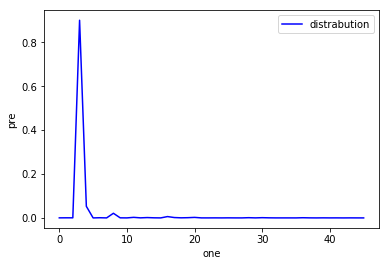

In [107]:

plt.plot(l, predictions[0], 'b', label='distrabution')
plt.xlabel('one')
plt.ylabel('pre')
plt.legend()
plt.show()